# Bookshelf optimization_1

In [1]:
from itertools import combinations
from amplify.client import FixstarsClient
from amplify import Solver

# Client の設定
PROXY = 'proxy'
TOKEN = 'token'
client = FixstarsClient(proxy=PROXY)
client.token = TOKEN
client.parameters.timeout = 10000  
client.parameters.outputs.duplicate = True  

## 0. 与えられたデータ
* 棚のサイズ；高さ$h$, 横幅$w$
* 棚板の数(棚板の厚さは考えない); $N$
* 本のデータは以下のデータフレームに格納

In [2]:
import pandas as pd
book_data = pd.read_csv("../books.csv", index_col=0)
book_data

,タイトル,シリーズ,ジャンル,厚さ(mm),高さ(mm),著者名,使う頻度
0,0_0,0,新書（ノベルス）,11.0,173,加藤朝陽,8.0
1,1_0,1,新書（ノベルス）,11.0,173,田中湊斗,3.0
2,2_0,2,文庫（文芸書）,13.0,148,石井陽斗,1.0
3,3_0,3,新書（文芸書）,11.0,173,高橋陽葵,3.0
4,3_1,3,新書（文芸書）,11.0,173,高橋陽葵,3.0
...,...,...,...,...,...,...,...
995,391_4,391,単行本（少年漫画）,23.0,182,山口湊斗,24.0
996,391_5,391,単行本（少年漫画）,23.0,182,山口湊斗,10.0
997,391_6,391,単行本（少年漫画）,23.0,182,山口湊斗,23.0
998,391_7,391,単行本（少年漫画）,23.0,182,山口湊斗,8.0


In [3]:
n_books      = 200
n_shelves    = 3
shelf_height = 500
shelf_width  = 300  # unit: mm

In [4]:
book_data = book_data[:n_books]
book_data

,タイトル,シリーズ,ジャンル,厚さ(mm),高さ(mm),著者名,使う頻度
0,0_0,0,新書（ノベルス）,11.0,173,加藤朝陽,8.0
1,1_0,1,新書（ノベルス）,11.0,173,田中湊斗,3.0
2,2_0,2,文庫（文芸書）,13.0,148,石井陽斗,1.0
3,3_0,3,新書（文芸書）,11.0,173,高橋陽葵,3.0
4,3_1,3,新書（文芸書）,11.0,173,高橋陽葵,3.0
...,...,...,...,...,...,...,...
195,70_0,70,新書（ノベルス）,11.0,173,田中花,7.0
196,71_0,71,新書（ノンフィクション）,11.0,173,岡田陽葵,7.0
197,71_1,71,新書（ノンフィクション）,11.0,173,岡田陽葵,5.0
198,71_2,71,新書（ノンフィクション）,11.0,173,岡田陽葵,4.0


In [5]:
def calc_i_spin(book_series_data, shelf_width):
    thickness = sorted(book_series_data["厚さ(mm)"])
    tmp = 0
    i = 0
    while 1:
        tmp += thickness[i]
        if tmp > 300:
            return i
        i += 1

In [6]:
# シリーズでまとめる
book_series_data = book_data.groupby(["シリーズ","ジャンル","高さ(mm)"]).sum()
book_series_data = book_series_data.reset_index().drop("シリーズ", axis=1)

In [7]:
# 一番多い漫画が一番高いせいで3段以外の選択肢がない（すみません）
book_series_data[["高さ(mm)",'厚さ(mm)']].groupby("高さ(mm)").sum()

,厚さ(mm)
高さ(mm),
148,780.0
173,726.0
182,1872.0


In [8]:
pd.set_option('display.max_rows', 100)
book_series_data

,ジャンル,高さ(mm),厚さ(mm),使う頻度
0,新書（ノベルス）,173,11.0,8.0
1,新書（ノベルス）,173,11.0,3.0
2,文庫（文芸書）,148,13.0,1.0
3,新書（文芸書）,173,44.0,17.0
4,単行本（少年漫画）,182,78.0,49.0
5,文庫（古典）,148,13.0,7.0
6,単行本（青年漫画）,182,25.0,0.0
7,単行本（青年漫画）,182,25.0,8.0
8,単行本（少女漫画）,182,25.3,25.0
9,新書（ノベルス）,173,22.0,11.0


# 150 150 200

## 1.スピンの設定

In [9]:
from amplify import(
    gen_symbols,
    BinaryPoly,
)
import math

# 変数の数
b_num = len(book_series_data)
i_num = calc_i_spin(book_series_data, shelf_width)
j_num = 3

# バイナリ変数を生成
q = gen_symbols(BinaryPoly, b_num, i_num, j_num)
sub = gen_symbols(BinaryPoly, 5, j_num)

In [10]:
sum_sub_list = []
for j in range(j_num):
    sum_sub = 0
    for s in range(5):
        sum_sub += 2**s * sub[s][j]
    sum_sub_list.append(sum_sub)

In [11]:
import numpy as np
q_fixed = np.zeros(shape=(b_num, i_num, j_num), dtype=object) 
for b in range(b_num):
    for i in range(i_num):
        for j in range(j_num):
            if not ((j < 2) and (b in book_series_data[book_series_data["高さ(mm)"] > 150].index)):
                q_fixed[b,i,j] = q[b][i][j]

In [12]:
# 目的関数の構築: バイナリ
f = BinaryPoly()
for i in range(i_num):
    for j in range(j_num):
        for b in range(b_num):
            if q_fixed[b,i,j] == 0:
                f += q[b][i][j]

# 同じ位置の本を1以下にする
for i in range(i_num):
    for j in range(j_num):
        tmp_q = 0
        for b in range(b_num):
            tmp_q += q_fixed[b][i][j]
        f += (tmp_q - 0.5) ** 2 - 0.25
    
# 同じ本は1冊まで
for b in range(b_num):
    tmp_q = 0
    for i in range(i_num):
        for j in range(j_num):
            tmp_q += q_fixed[b][i][j]
    f += (tmp_q - 0.5) ** 2 - 0.25

# 厚さ300に近づける
for j in range(j_num):
    tmp_q = 0
    for i in range(i_num): 
        for b in range(b_num):
            tmp_q += q_fixed[b][i][j] * book_series_data['厚さ(mm)'][b]
    f += (shelf_width - tmp_q - sum_sub_list[j]) ** 2 / shelf_width

# 頻度が多い本優先
tmp_q = 0
for b in range(b_num):
    freq = book_series_data['使う頻度'][b]
    for i in range(i_num):
        for j in range(j_num): 
            tmp_q += q_fixed[b][i] [j] * freq
f -= tmp_q / i_num / j_num

# 同じジャンルが隣だとエネルギー減少
tmp_q = 0
for j in range(j_num):
    for i in range(i_num-1):
        for genre in book_series_data["ジャンル"].unique():
            df_genre = book_series_data[book_series_data["ジャンル"]==genre]
            c = 0
            tmp_q = 0
            for b1, b2 in combinations(df_genre.index, 2):
                tmp_q -= q_fixed[b1][i+1][j] * q_fixed[b2][i][j]
                c += 1
            f -= tmp_q /c/i_num/j_num
            
# 隣の本と高さを近くする
max_height =  book_series_data["高さ(mm)"].max()
tmp_q = 0
for j in range(j_num):
    for i in range(i_num-1):
        tmp_q1 = 0
        tmp_q2 = 0
        for b in range(b_num):
            if book_series_data["高さ(mm)"][b] == 148:
                height = 0
            elif book_series_data["高さ(mm)"][b] == 173:
                height = 1
            else :
                height = 2
            tmp_q1 += q_fixed[b][i][j] * height
            tmp_q2 += q_fixed[b][i+1][j] * height
        tmp_q += (tmp_q1 - tmp_q2) ** 2
f += tmp_q

In [13]:
solver = Solver(client)
result = solver.solve(f)

In [14]:
from amplify import decode_solution
for sol in result:
    solution = decode_solution(q, sol.values)
    break

In [15]:
def check_pos(sol):
    for i in range(i_num):
        for j in range(j_num):
            tmp = 0
            for b in range(b_num):
                tmp += int(sol[b][i][j])
                if tmp > 1:
                    print("pos_error", i, j)
                    break

def check_book(sol):
    for b in range(b_num):
        tmp = 0
        for i in range(i_num):
            for j in range(j_num):
                tmp += int(sol[b][i][j])
                if tmp > 1:
                    print("book_error", b)
                    break

In [16]:
# 制約のエラーチェック
check_pos(solution)
check_book(solution)

In [17]:
# 結果の出力
def check_order(sol):
    order_list = []
    for j in range(j_num):
        tmp_order_list = []
        for i in range(i_num):
            for b in range(b_num):
                if int(sol[b][i][j]):
                    tmp_order_list.append(b)
        order_list.append(tmp_order_list)
    return order_list
order_list_1 = check_order(solution)
order_list_1

[[34, 68, 62, 47, 43, 11, 16],
 [13, 36, 21, 69, 5, 38, 67, 65],
 [25, 0, 9, 37, 54, 27, 26, 23, 12, 58, 35, 70]]

In [18]:
# 厚みの確認
def calc_width(order_list):
    thickness_list = []
    for order in order_list:
        thickness = 0
        for b in order:
            thickness += book_series_data['厚さ(mm)'][b]
        thickness_list.append(thickness)
    return thickness_list
calc_width(order_list_1)

[299.0, 299.0, 299.0]

In [19]:
# スコアの確認
def calc_score(order_list):
    score = 0
    for order in order_list:
        for o in range(len(order)):
            score += book_series_data['使う頻度'][order[o]]
            if o+1 < len(order):
                if book_series_data['ジャンル'][order[o]] == book_series_data['ジャンル'][order[o+1]]:
                    score += 5
                if book_series_data['高さ(mm)'][order[o]] == book_series_data['高さ(mm)'][order[o+1]]:
                    score += 5
    return score
calc_score(order_list_1)

545.0

In [20]:
# 高さの確認
height_list = []
for order in order_list_1:
    tmp_height_list = []
    for b in order:
        tmp_height_list.append(book_series_data["高さ(mm)"][b])
    height_list.append(tmp_height_list)
height_list

[[148, 148, 148, 148, 148, 148, 148],
 [148, 148, 148, 148, 148, 148, 148, 148],
 [148, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173]]

In [21]:
# ジャンルの確認
genre_list = []
for order in order_list_1:
    tmp_genre_list = []
    for b in order:
        tmp_genre_list.append(book_series_data["ジャンル"][b])
    genre_list.append(tmp_genre_list)
genre_list

[['文庫（ノベルス）', '文庫（古典）', '文庫（古典）', '文庫（古典）', '文庫（古典）', '文庫（ノベルス）', '文庫（古典）'],
 ['文庫（ノベルス）',
  '文庫（古典）',
  '文庫（ノベルス）',
  '文庫（文芸書）',
  '文庫（古典）',
  '文庫（ノベルス）',
  '文庫（文芸書）',
  '文庫（古典）'],
 ['文庫（ノベルス）',
  '新書（ノベルス）',
  '新書（ノベルス）',
  '新書（文芸書）',
  '新書（ノンフィクション）',
  '新書（文芸書）',
  '新書（ノンフィクション）',
  '新書（ノベルス）',
  '新書（ノンフィクション）',
  '新書（文芸書）',
  '新書（ノベルス）',
  '新書（ノベルス）']]

In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def vis_shelf(shelf_board, order_list):
    color = ["r", "g", "b", "c", "m", "y", "k", "orange", "purple", "lightgreen"]
    genre = list(book_series_data["ジャンル"].unique())
    
    fig = plt.figure(figsize=(6, 10))
    ax = plt.axes()
    ax.set_xlim(0, shelf_width)
    ax.set_ylim(0, shelf_height)

    # fc = face color, ec = edge color
    y = shelf_height 
    for j, order in enumerate(order_list):
        y -= shelf_board[j]
        ax.hlines(y, 0, shelf_width, "black") 
        x = 0
        for b in order:
            r = patches.Rectangle(
                xy=(x, y),
                width=book_series_data['厚さ(mm)'][b],
                height=book_series_data['高さ(mm)'][b], 
                ec=color[genre.index(book_series_data["ジャンル"][b])],
                fc=color[genre.index(book_series_data["ジャンル"][b])], alpha=0.3)
            ax.add_patch(r)
            x += book_series_data['厚さ(mm)'][b]
    plt.show()

# 250ずつ

In [23]:
from amplify import(
    gen_symbols,
    BinaryPoly,
)
import math

# 変数の数
b_num = len(book_series_data)
i_num = calc_i_spin(book_series_data, shelf_width)
j_num = 2

# バイナリ変数を生成
q = gen_symbols(BinaryPoly, b_num, i_num, j_num)
sub = gen_symbols(BinaryPoly, 5, j_num)

In [24]:
sum_sub_list = []
for j in range(j_num):
    sum_sub = 0
    for s in range(5):
        sum_sub += 2**s * sub[s][j]
    sum_sub_list.append(sum_sub)

In [25]:
# 目的関数の構築: バイナリ
f = BinaryPoly()

# 同じ位置の本を1以下にする
for i in range(i_num):
    for j in range(j_num):
        tmp_q = 0
        for b in range(b_num):
            tmp_q += q[b][i][j]
        f += (tmp_q - 0.5) ** 2 - 0.25
    
# 同じ本は1冊まで
for b in range(b_num):
    tmp_q = 0
    for i in range(i_num):
        for j in range(j_num):
            tmp_q += q[b][i][j]
    f += (tmp_q - 0.5) ** 2 - 0.25

# 厚さ300に近づける
for j in range(j_num):
    tmp_q = 0
    for i in range(i_num): 
        for b in range(b_num):
            tmp_q += q[b][i][j] * book_series_data['厚さ(mm)'][b]
    f += (shelf_width - tmp_q - sum_sub_list[j]) ** 2 / shelf_width *5

# 頻度が多い本優先
tmp_q = 0
for b in range(b_num):
    freq = book_series_data['使う頻度'][b]
    for i in range(i_num):
        for j in range(j_num): 
            tmp_q += q[b][i] [j] * freq
f -= tmp_q / i_num / j_num * 1.5

# 同じジャンルが隣だとエネルギー減少
tmp_q = 0
for j in range(j_num):
    for i in range(i_num-1):
        for genre in book_series_data["ジャンル"].unique():
            df_genre = book_series_data[book_series_data["ジャンル"]==genre]
            c = 0
            tmp_q = 0
            for b1, b2 in combinations(df_genre.index, 2):
                tmp_q -= q[b1][i+1][j] * q[b2][i][j]
                c += 1
            f -= tmp_q /c/i_num/j_num
            
# 隣の本と高さを近くする
max_height =  book_series_data["高さ(mm)"].max()
tmp_q = 0
for j in range(j_num):
    for i in range(i_num-1):
        tmp_q1 = 0
        tmp_q2 = 0
        for b in range(b_num):
            if book_series_data["高さ(mm)"][b] == 148:
                height = 0
            elif book_series_data["高さ(mm)"][b] == 173:
                height = 1
            else :
                height = 2
            tmp_q1 += q[b][i][j] * height
            tmp_q2 += q[b][i+1][j] * height
        tmp_q += (tmp_q1 - tmp_q2) ** 2
f += tmp_q

In [26]:
result = solver.solve(f)

In [27]:
from amplify import decode_solution
for sol in result:
    solution = decode_solution(q, sol.values)
    break

In [28]:
# 制約のエラーチェック
check_pos(solution)
check_book(solution)

In [29]:
# 結果の出力
order_list_2 = check_order(solution)
order_list_2

[[21, 49, 45, 22, 8, 31, 18, 20, 33, 51, 40, 59],
 [35, 70, 58, 26, 19, 9, 27, 23, 0, 37, 68, 25, 67, 36, 34]]

In [30]:
# 厚みのチェック
calc_width(order_list_2)

[300.3, 300.0]

In [31]:
# 結果スコアの算出
calc_score(order_list_2)

515.0

In [32]:
# 高さの確認
height_list = []
for order in order_list_2:
    tmp_height_list = []
    for b in order:
        tmp_height_list.append(book_series_data["高さ(mm)"][b])
    height_list.append(tmp_height_list)
height_list

[[148, 173, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182],
 [173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 148, 148, 148, 148, 148]]

In [33]:
# ジャンルの確認
genre_list = []
for order in order_list_2:
    tmp_genre_list = []
    for b in order:
        tmp_genre_list.append(book_series_data["ジャンル"][b])
    genre_list.append(tmp_genre_list)
genre_list

[['文庫（ノベルス）',
  '新書（ノンフィクション）',
  '単行本（少女漫画）',
  '単行本（少女漫画）',
  '単行本（少女漫画）',
  '単行本（少女漫画）',
  '単行本（青年漫画）',
  '単行本（少年漫画）',
  '単行本（少年漫画）',
  '単行本（少年漫画）',
  '単行本（少年漫画）',
  '単行本（少年漫画）'],
 ['新書（ノベルス）',
  '新書（ノベルス）',
  '新書（文芸書）',
  '新書（ノンフィクション）',
  '新書（文芸書）',
  '新書（ノベルス）',
  '新書（文芸書）',
  '新書（ノベルス）',
  '新書（ノベルス）',
  '新書（文芸書）',
  '文庫（古典）',
  '文庫（ノベルス）',
  '文庫（文芸書）',
  '文庫（古典）',
  '文庫（ノベルス）']]

### 結果の可視化

#### 棚板を150mm 150mm 200mmの高さで設置した場合

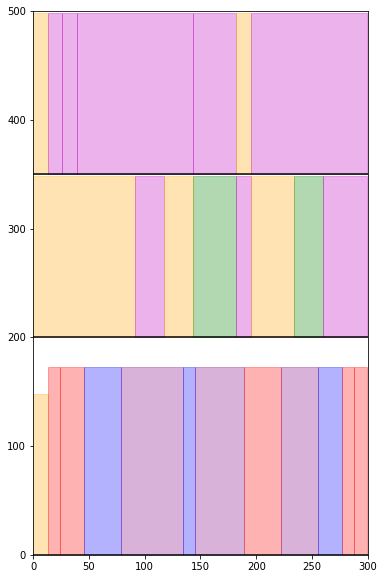

In [38]:
vis_shelf([150, 150, 200], order_list_1)

#### 棚板を250mm,250mmの高さで設置した場合

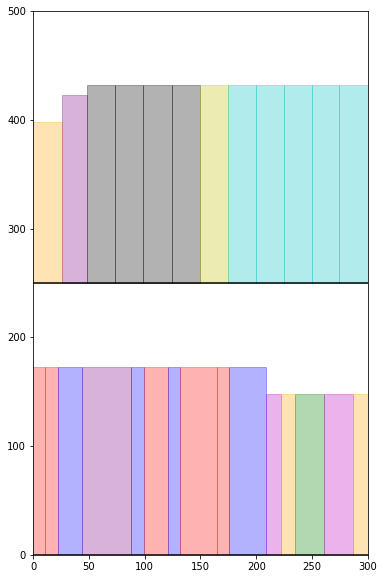

In [37]:
vis_shelf([250,250], order_list_2)